In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.CNN as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
"""
    conv0 (relu0) - conv1 (relu1) - pool2 - 
    conv3 (relu3) - conv4 (relu4) - pool5 - 
    affine6 (relu6) - affine7 - softmax (output)
"""

input_dim = (1, 28, 28)
cnn_param_list = [
    {'type': 'conv', 'filter_num': 16, 'filter_size': 3, 'pad': 1, 'stride': 1},
    {'type': 'conv', 'filter_num': 16, 'filter_size': 3, 'pad': 1, 'stride': 1},
    {'type': 'pool', 'filter_size': 2, 'stride': 2},
    {'type': 'conv', 'filter_num': 32, 'filter_size': 3, 'pad': 1, 'stride': 1},
    {'type': 'conv', 'filter_num': 32, 'filter_size': 3, 'pad': 2, 'stride': 1},
    {'type': 'pool', 'filter_size': 2, 'stride': 2},
]
fc_hidden_size = 64
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.CNN(
    input_dim=input_dim,
    cnn_param_list=cnn_param_list,
    fc_hidden_size=fc_hidden_size,
    output_size=output_size,
    input_node=x,
    target_node=target,
    conv_initializer=tfe.Initializer.Conv_Xavier_Normal.value,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Convolutional Neural Network Model - ID: R4QGNML6


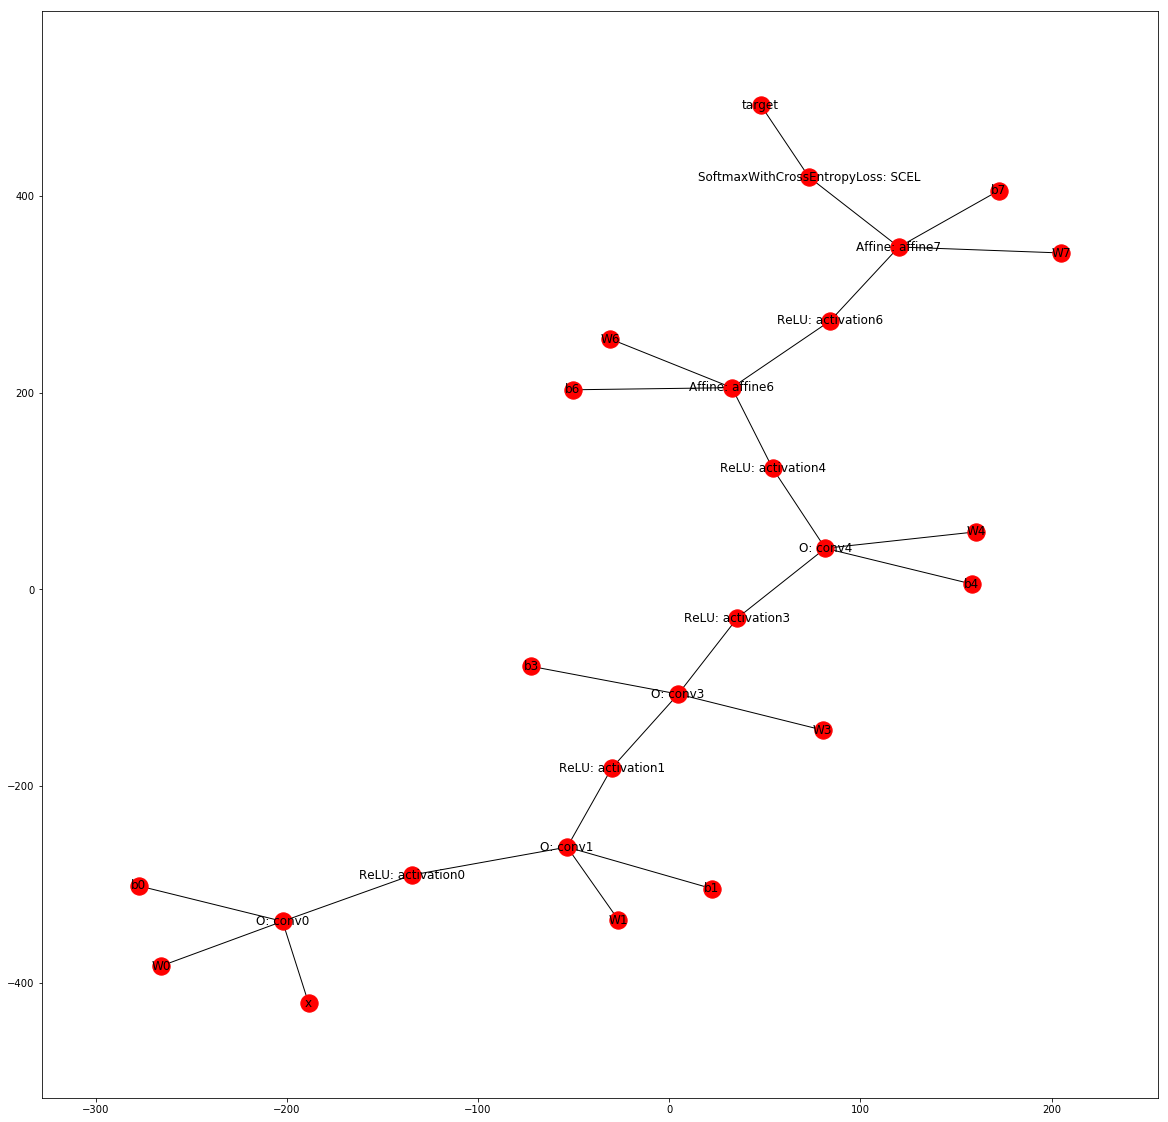

In [5]:
n.draw_and_show(figsize=(20, 20))

In [6]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1044
-- Learning Started --
Epoch   0 Completed - Train Error:19.98979 - Validation Error:19.89820 - Test Accuracy:0.10440 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:0.29211 - Validation Error:0.32502 - Test Accuracy:0.90230 <== Minimal Val. Error
Epoch   2 Completed - Train Error:0.21846 - Validation Error:0.22660 - Test Accuracy:0.93360 <== Minimal Val. Error
Epoch   3 Completed - Train Error:0.13819 - Validation Error:0.18892 - Test Accuracy:0.94450 <== Minimal Val. Error
Epoch   4 Completed - Train Error:0.13943 - Validation Error:0.16971 - Test Accuracy:0.94960 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.07223 - Validation Error:0.15679 - Test Accuracy:0.95570 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  5 (Fold:  0 & Epoch:  5) - Train Error:0.07223 - Validation Error:0.15679 - Test Accuracy:0.95570

Fold:  1
Epoch   1 Completed - Train Error:0.07326 - Validation Error:

In [6]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Va. Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch: 53, Min Train Error:0.00317, Min Validation Error:0.00383, Test Accuracy:0.97230
Mean of Min Va. Error For All Folds:0.03510


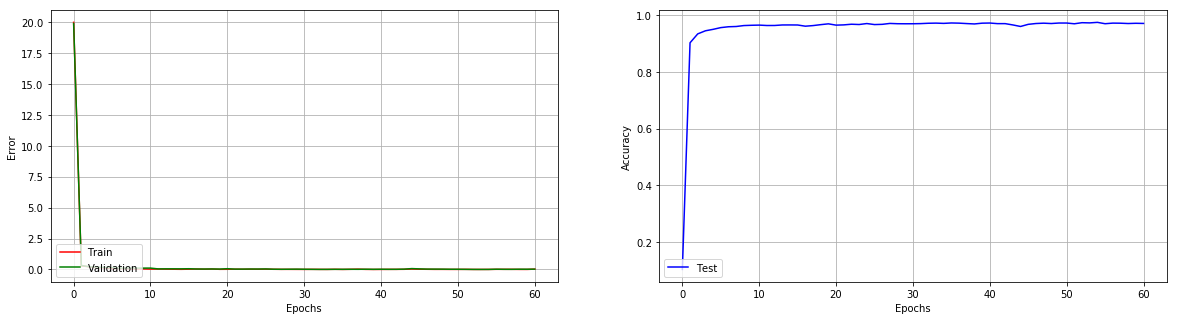

In [7]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 80, Prediction: Nine, Ground Truth: Seven
False Prediction Index: 149, Prediction: Nine, Ground Truth: Two
False Prediction Index: 151, Prediction: Eight, Ground Truth: Nine
False Prediction Index: 158, Prediction: Two, Ground Truth: Three
False Prediction Index: 195, Prediction: One, Ground Truth: Three


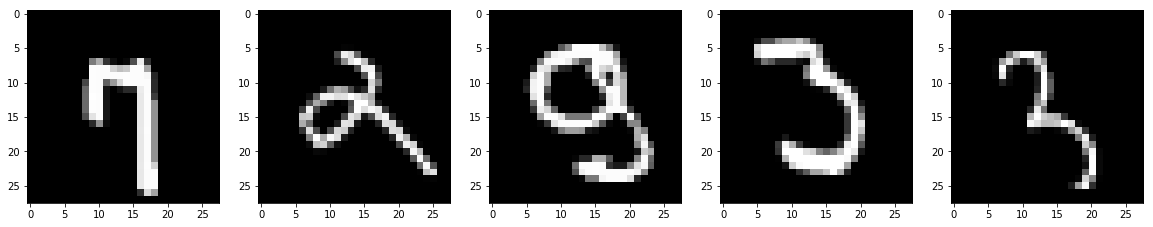

In [8]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

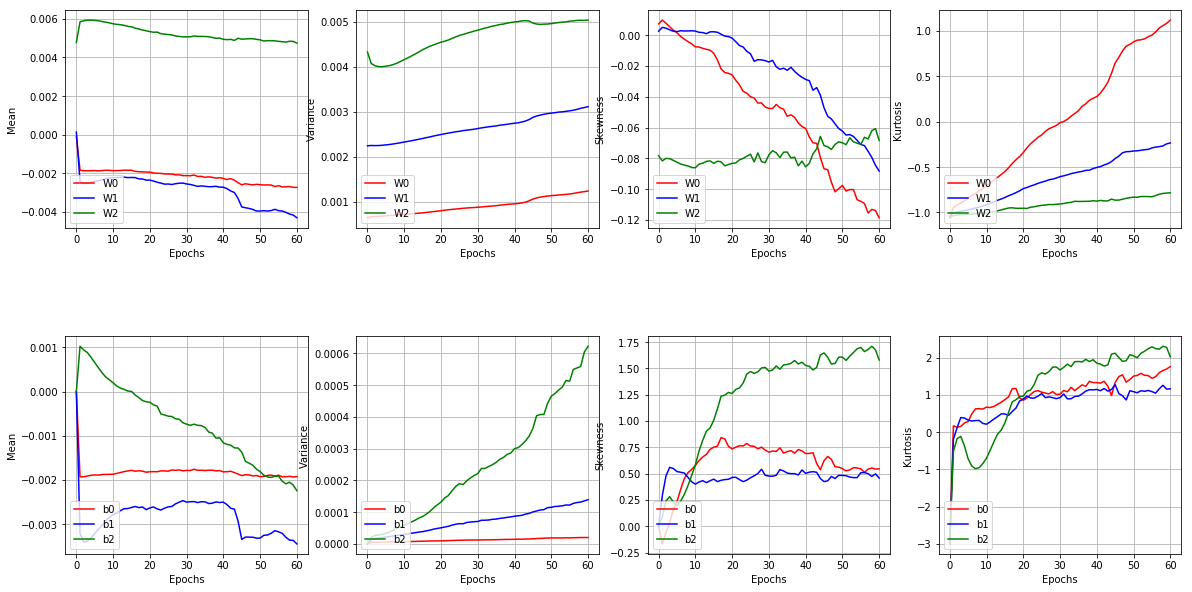

In [9]:
n.draw_param_description(figsize=(20, 10))

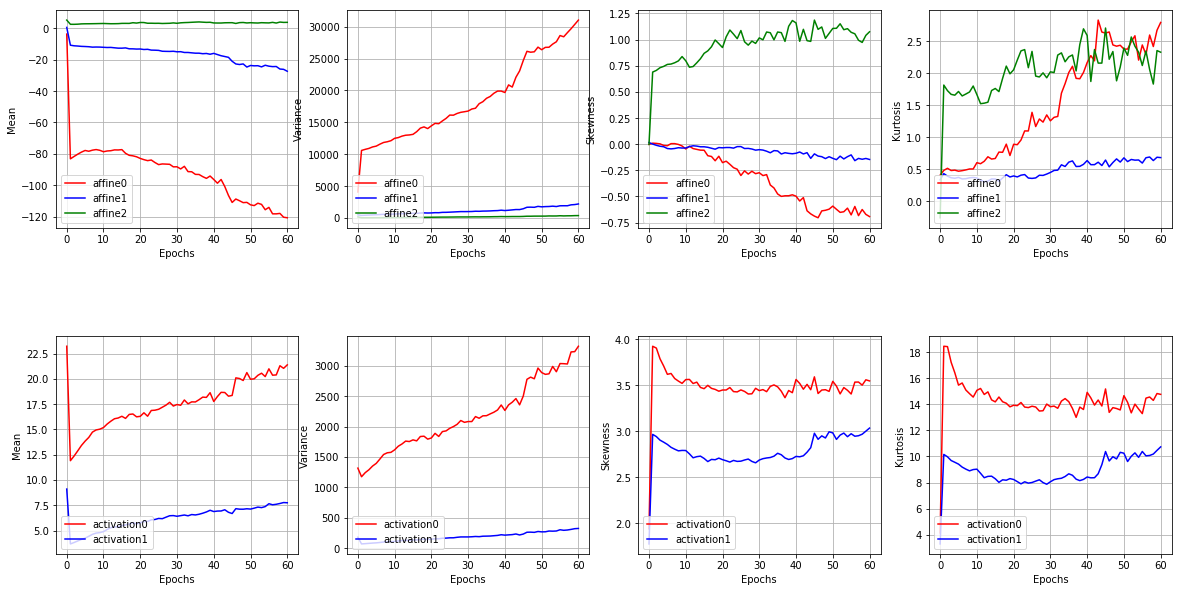

In [10]:
n.draw_output_description(figsize=(20, 10))